<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v6_BIST100_TESTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection


SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "GOZDE.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 193 # @param {type:"number"}
PURSE = 100241  # @param {type: "number"}
EXCHANGE = "bist100"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [2]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2023-11-29
193 days before current date:  2023-05-20
0 days before current date:  2023-11-30


In [3]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88649 sha256=eae3a300ccfde1a00d9197603217543e9b83c26608d16792ac83d68933d8cab2
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=1c7185069525464a2d077fe60d8d15ae29f05a6950cbe00220bab6959d6c46c0
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [4]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist100.csv bist100 ShoppingList.csv GOZDE.csv


In [5]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




Please upload GOZDE.csv to be analysed:


Saved GOZDE.csv to /content/GOZDE.csv


None

File Best_PF_For_bist100.csv is present


In [6]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
XU100.IS,XU100.IS,8093.54,2023/11/28,17:10 TRT,-13.649902,8115.99,8149.44,8046.08,0,20231124,7960.00,0.00001,0.0,NaN,NaN,NaN,0.0796,0.080935,1.677638
TKNSA.IS,TKNSA.IS,36.44,2023/11/28,17:09 TRT,-0.740002,37.18,37.20,36.00,3963303,20231124,37.32,203.00000,0.0,NaN,NaN,NaN,7575.9600,7397.320000,-2.357985
ECZYT.IS,ECZYT.IS,342.00,2023/11/28,17:09 TRT,15.750000,326.50,349.25,323.50,2969032,20231127,336.00,38.00000,0.0,NaN,NaN,NaN,12768.0000,12996.000000,1.785714
ULKER.IS,ULKER.IS,88.70,2023/11/28,17:09 TRT,-0.550003,89.50,91.00,88.00,5311042,20231124,90.25,282.00000,0.0,NaN,NaN,NaN,25450.5000,25013.400000,-1.717452
KONYA.IS,KONYA.IS,8962.50,2023/11/28,17:09 TRT,-57.500000,9105.00,9112.50,8652.50,68858,20231124,8127.00,3.00000,0.0,NaN,NaN,NaN,24381.0000,26887.500000,10.280546
SKBNK.IS,SKBNK.IS,7.22,2023/11/28,17:09 TRT,-0.210000,7.45,7.46,7.22,71548569,20231124,7.27,8217.00000,0.0,NaN,NaN,NaN,59737.5900,59326.740000,-0.687758
TURSG.IS,TURSG.IS,40.60,2023/11/28,17:09 TRT,-1.360001,42.10,42.40,39.90,5291610,20231124,41.44,1557.00000,0.0,NaN,NaN,NaN,64522.0800,63214.200000,-2.027027


In [7]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [8]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [9]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [10]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

194835.2409354

In [11]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
MYPF



<ipython-input-11-f0354df3cca1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-11-f0354df3cca1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
TURSG.IS,1557.00000,41.44,64522.0800,40.60,63214.200000,33.18436,32.44495,-2.027027,63214.0,1556.0
SKBNK.IS,8217.00000,7.27,59737.5900,7.22,59326.740000,30.72365,30.44970,-0.687758,59326.0,8216.0
ULKER.IS,282.00000,90.25,25450.5000,88.70,25013.400000,13.08945,12.83823,-1.717452,25013.0,281.0
KONYA.IS,3.00000,8127.00,24381.0000,8962.50,26887.500000,12.53940,13.80012,10.280546,26887.0,2.0
ECZYT.IS,38.00000,336.00,12768.0000,342.00,12996.000000,6.56671,6.67025,1.785714,12995.0,37.0
TKNSA.IS,203.00000,37.32,7575.9600,36.44,7397.320000,3.89639,3.79671,-2.357985,7397.0,202.0
XU100.IS,0.00001,7960.00,0.0796,8093.54,0.080935,0.00004,0.00004,1.677638,0.0,0.0


In [12]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [13]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    print("Ordered Table: \n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio

In [14]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [15]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
TURSG.IS,1557.00000,41.44,64522.0800,40.60,63214.200000,33.18436,32.44495,-2.027027,63214.0,1556.0
SKBNK.IS,8217.00000,7.27,59737.5900,7.22,59326.740000,30.72365,30.44970,-0.687758,59326.0,8216.0
KONYA.IS,3.00000,8127.00,24381.0000,8962.50,26887.500000,12.53940,13.80012,10.280546,26887.0,2.0
ULKER.IS,282.00000,90.25,25450.5000,88.70,25013.400000,13.08945,12.83823,-1.717452,25013.0,281.0
ECZYT.IS,38.00000,336.00,12768.0000,342.00,12996.000000,6.56671,6.67025,1.785714,12995.0,37.0
TKNSA.IS,203.00000,37.32,7575.9600,36.44,7397.320000,3.89639,3.79671,-2.357985,7397.0,202.0
XU100.IS,0.00001,7960.00,0.0796,8093.54,0.080935,0.00004,0.00004,1.677638,0.0,0.0


In [16]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2023-05-22 00:00:00+03:00   9.80  10.08   9.72   9.95   2426328        0.0   
2023-05-23 00:00:00+03:00   9.96  10.48   9.96  10.08   3331701        0.0   
2023-05-24 00:00:00+03:00  10.05  10.18   9.87   9.92   2222239        0.0   
2023-05-25 00:00:00+03:00   9.92  10.08   9.85   9.90    465964        0.0   
2023-05-26 00:00:00+03:00   9.90  10.20   

,TURSG.IS,SKBNK.IS,KONYA.IS,ULKER.IS,ECZYT.IS,TKNSA.IS,XU100.IS,PF_Value,pct_change
Date,,,,,,,,,
2023-05-22 00:00:00+03:00,9.95,2.17,2475.9,32.08,116.80,15.93,4466.2,194835.240935,NaN
2023-05-23 00:00:00+03:00,10.08,2.15,2406.9,31.54,117.80,15.94,4471.0,194119.330935,-0.003674
2023-05-24 00:00:00+03:00,9.92,2.13,2460.0,30.96,114.90,15.80,4424.9,192248.390935,-0.009638
2023-05-25 00:00:00+03:00,9.90,2.17,2539.0,30.44,119.10,15.62,4428.0,193982.490935,0.009020
2023-05-26 00:00:00+03:00,10.10,2.20,2605.0,30.52,125.80,16.26,4580.7,197836.240935,0.019866
...,...,...,...,...,...,...,...,...,...
2023-11-22 00:00:00+03:00,38.90,7.29,8120.0,89.60,290.00,37.44,7987.0,649185.190935,-0.001641
2023-11-23 00:00:00+03:00,41.00,7.30,7932.5,91.40,295.00,37.60,7898.6,662956.320935,0.021213
2023-11-24 00:00:00+03:00,41.44,7.29,8200.0,90.20,324.50,37.42,7960.0,670409.430935,0.011242


In [17]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100

0.9683580408532838

Showing Tearsheet of GOZDE.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-05-23
End date,2023-11-28
Total months,6
,Backtest
Annual return,960.3%
Cumulative returns,244.4%
Annual volatility,37.2%
Sharpe ratio,6.56
Calmar ratio,72.12
Stability,0.94
Max drawdown,-13.3%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************



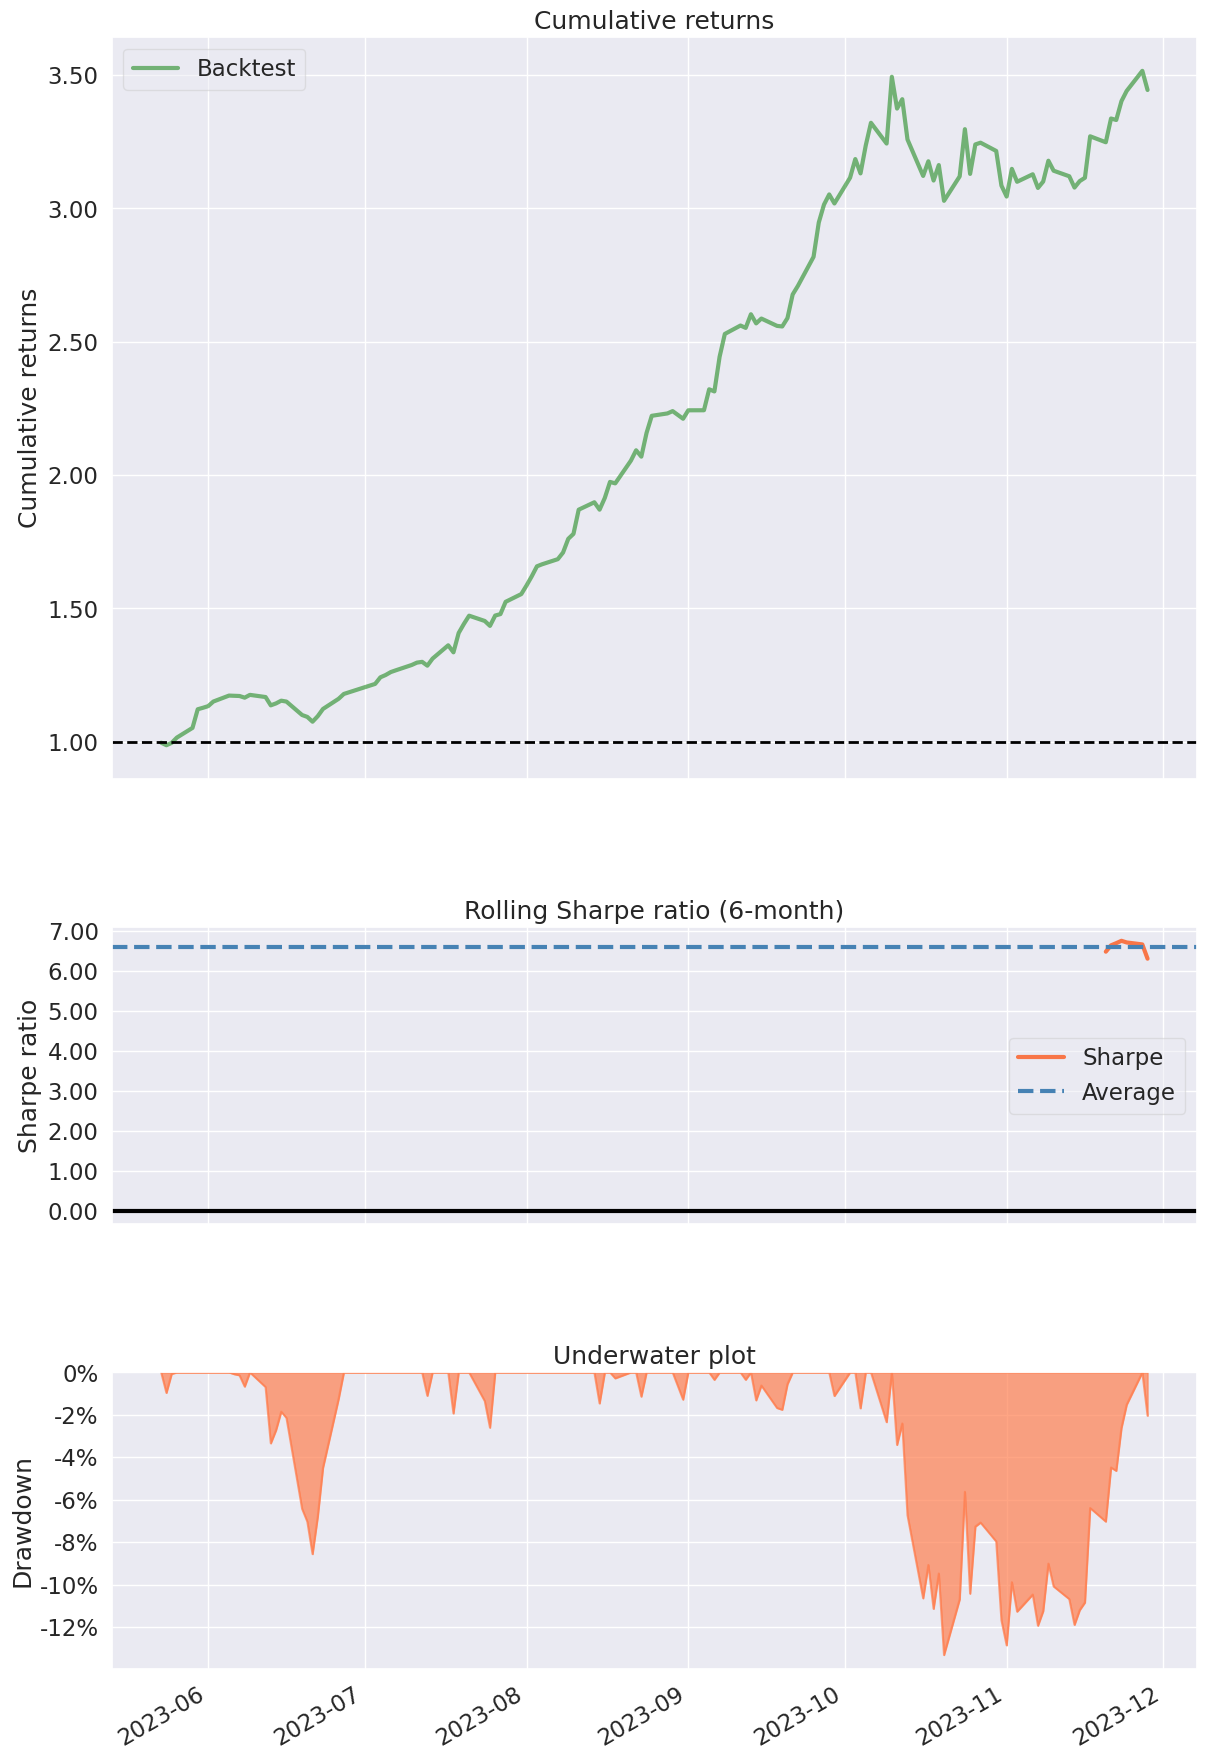

In [18]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [19]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-19-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-19-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-19-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical

Annual return           9.602656
Cumulative returns      2.444467
Annual volatility       0.371821
Sharpe ratio            6.562996
Calmar ratio           72.115730
Stability               0.943689
Max drawdown           -0.133156
Omega ratio             2.834836
Sortino ratio          12.886836
Skew                   -0.065102
Kurtosis                0.243289
Tail ratio              1.582502
Daily value at risk    -0.037162
dtype: float64

In [20]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
TURSG.IS,1557.00000,41.44,63212.35,40.60,257931.80,32.81,38.56,301.79,63214.0,1556.0,3.244495e-01,9.95,40.6,63214.196504,6353
SKBNK.IS,8217.00000,7.27,59325.63,7.22,197387.58,30.80,29.51,231.11,59326.0,8216.0,3.044970e-01,2.17,7.22,59326.746359,27339
KONYA.IS,3.00000,8127.00,24759.0,8962.50,89625.00,12.85,13.40,266.05,26887.0,2.0,1.380012e-01,2475.9,8962.5,26887.497051,10
ULKER.IS,282.00000,90.25,24990.32,88.70,69097.30,12.97,10.33,173.30,25013.0,281.0,1.283823e-01,32.08,88.7,25013.396352,779
ECZYT.IS,38.00000,336.00,12964.8,342.00,37962.00,6.73,5.68,195.78,12995.0,37.0,6.670250e-02,116.8,342.0,12995.997658,111
TKNSA.IS,203.00000,37.32,7391.52,36.44,16908.16,3.84,2.53,125.62,7397.0,202.0,3.796710e-02,15.93,36.44,7397.329076,464
XU100.IS,0.00001,7960.00,0.0,8093.54,0.00,0.00,0.00,0.00,0.0,0.0,4.000000e-07,4466.2,8093.5,0.077934,0


In [21]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [22]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [23]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [24]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [25]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [26]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [27]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [28]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['TURSG.IS',
 'SKBNK.IS',
 'ULKER.IS',
 'KONYA.IS',
 'ECZYT.IS',
 'TKNSA.IS',
 'XU100.IS',
 'TRY=X']

In [29]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [30]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 8 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 8 TICKERS from BIST30
****************************************************************


In [31]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [32]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [33]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [34]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [35]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [36]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [37]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [38]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.20880011, 0.27464293, 0.04058645, 0.08186854, 0.11905669,
       0.10709923, 0.14279422, 0.02515184])

In [39]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [40]:
Optimal_weights_for_Percent_Returns = FindWeights()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.2088 0.2746 0.0406 0.0819 0.1191 0.1071 0.1428 0.0252]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [41]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
SKBNK.IS    53501.76
TURSG.IS    40681.60
XU100.IS    27822.47
ECZYT.IS    23204.88
TKNSA.IS    20866.85
KONYA.IS    15957.01
ULKER.IS     7910.31
TRY=X        4909.85
Name: Amount in 194835.2409354 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [42]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


making operation with  Best_PF_For_bist100.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
ISMEN.IS    30296.88
GARAN.IS    28972.00
IZMDC.IS    25211.68
PGSUS.IS    23068.49
OTKAR.IS    21918.96
AHGAZ.IS    20496.67
AEFES.IS    13541.05
TUKAS.IS    10560.07
GLYHO.IS     8962.42
SMRTG.IS     5026.75
BIMAS.IS     3429.10
Name: Amount in 194835.2409354 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [43]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,13,IZMDC.IS,15.53,15530.0,8.70,1785.0,0.1553,5.17,8.70,15530.0,3003,15525.51,26126.10,68.28,15.62,12.94,12940.0,8.70,1785.0
1,0,GARAN.IS,14.51,14510.0,55.50,261.0,0.1451,26.78,55.50,14510.0,541,14487.98,30025.50,107.24,14.57,14.87,14870.0,55.50,261.0
2,60,AHGAZ.IS,12.28,12280.0,13.02,943.0,0.1228,7.52,13.02,12280.0,1632,12272.64,21248.64,73.14,12.35,10.52,10520.0,13.02,943.0
3,11,PGSUS.IS,11.76,11760.0,956.00,12.0,0.1176,458.80,956.00,11760.0,25,11470.00,23900.00,108.37,11.54,11.84,11840.0,956.00,12.0
4,18,OTKAR.IS,10.83,10830.0,355.00,30.0,0.1083,167.00,355.00,10830.0,64,10688.00,22720.00,112.57,10.75,11.25,11250.0,355.00,30.0
5,47,ISMEN.IS,10.31,10310.0,34.92,295.0,0.1031,11.46,34.92,10310.0,899,10302.54,31393.08,204.71,10.36,15.55,15550.0,34.92,295.0
6,19,AEFES.IS,7.45,7450.0,108.78,68.0,0.0745,57.61,108.78,7450.0,129,7431.69,14032.62,88.82,7.48,6.95,6950.0,108.78,68.0
7,30,TUKAS.IS,5.60,5600.0,9.11,614.0,0.0560,4.66,9.11,5600.0,1201,5596.66,10941.11,95.49,5.63,5.42,5420.0,9.11,614.0
8,52,GLYHO.IS,5.45,5450.0,13.85,393.0,0.0545,8.12,13.85,5450.0,671,5448.52,9293.35,70.57,5.48,4.60,4600.0,13.85,393.0
9,80,SMRTG.IS,2.57,2570.0,79.00,32.0,0.0257,38.66,79.00,2570.0,66,2551.56,5214.00,104.35,2.57,2.58,2580.0,79.00,32.0


In [44]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
ISMEN.IS    15.55
GARAN.IS    14.87
IZMDC.IS    12.94
PGSUS.IS    11.84
OTKAR.IS    11.25
AHGAZ.IS    10.52
AEFES.IS     6.95
TUKAS.IS     5.42
GLYHO.IS     4.60
SMRTG.IS     2.58
BIMAS.IS     1.76
Name: %, dtype: float64

In [45]:
np.round(Markowitz_Weights,2)

,%,Amount in 194835.2409354 TL
assets,,
ISMEN.IS,15.55,30296.88
GARAN.IS,14.87,28972.00
IZMDC.IS,12.94,25211.68
PGSUS.IS,11.84,23068.49
OTKAR.IS,11.25,21918.96
AHGAZ.IS,10.52,20496.67
AEFES.IS,6.95,13541.05
TUKAS.IS,5.42,10560.07
GLYHO.IS,4.60,8962.42


In [46]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'TURSG': -63214.2, 'SKBNK': -59326.75, 'ULKER': -25013.4, 'KONYA': -26887.5, 'ECZYT': -12996.0, 'TKNSA': -7397.33, 'XU100': -0.08, 'ISMEN': 30296.88, 'GARAN': 28972.0, 'IZMDC': 25211.68, 'PGSUS': 23068.49, 'OTKAR': 21918.96, 'AHGAZ': 20496.67, 'AEFES': 13541.05, 'TUKAS': 10560.07, 'GLYHO': 8962.42, 'SMRTG': 5026.75, 'BIMAS': 3429.1}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
       Buy/Sell
TURSG -63214.20
SKBNK -59326.75
ULKER -25013.40
KONYA -26887.50
ECZYT -12996.00
TKNSA  -7397.33
XU100     -0.08
ISMEN  30296.88
GARAN  28972.00
IZMDC  25211.68
PGSUS  23068.49
OTKAR  21918.96
AHGAZ  20496.67
AEFES  13541.05
TUKAS  10560.07
GLYHO   8962.42
SMRTG   5026.75
BIMAS   3429.10
    Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0           13  IZMDC.IS  15.53  15530.0       8.70         1785.0   
1            0  GARAN.IS  14.51  14510.0      55.50          261.0   
2           60  